In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_excel("maliciousornot.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
df.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [6]:
df.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<AxesSubplot:xlabel='Type', ylabel='count'>

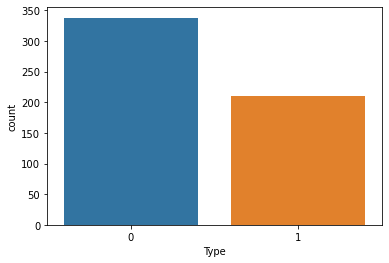

In [7]:
sbn.countplot(x = "Type", data = df)

<AxesSubplot:>

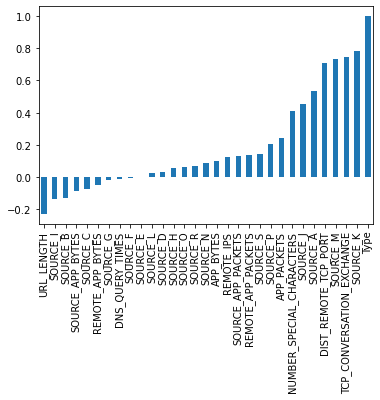

In [9]:
df.corr()["Type"].sort_values().plot(kind = "bar")

In [10]:
y = df["Type"].values
x = df.drop("Type",axis = 1).values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 15)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(x_train)

MinMaxScaler()

In [16]:
x_train = scaler.transform(x_train)

In [17]:
x_test = scaler.transform(x_test)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense, Activation,Dropout

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
x_train.shape

(383, 30)

In [30]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation ="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [31]:
model.fit(x = x_train, y =y_train, epochs=700,validation_data=(x_test,y_test),verbose = 1)

Epoch 1/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6879 - val_loss: 0.6913
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6744 - val_loss: 0.6828
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6581 - val_loss: 0.6687
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6369 - val_loss: 0.6534
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6085 - val_loss: 0.6291
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5709 - val_loss: 0.5922
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5219 - val_loss: 0.5529
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4650 - val_loss: 0.4931
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4055 - val_loss: 0.4548
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3540 - val_loss: 0.4213
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0499 - val_loss: 0.1673
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.1703
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0484 - val_loss: 0.1635
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0485 - val_loss: 0.1659
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0478 - val_loss: 0.1627
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0474 - val_loss: 0.1641
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.1634
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0449 - val_loss: 0.1613
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 0.1581
Epoch 92/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0466 - val_loss: 0.1630
Epoch 93/700


12/12 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.1427
Epoch 165/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.1392
Epoch 166/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.1391
Epoch 167/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.1410
Epoch 168/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.1404
Epoch 169/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.1438
Epoch 170/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1415
Epoch 171/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.1430
Epoch 172/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.1416
Epoch 173/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.1442
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.1919
Epoch 246/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.1949
Epoch 247/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.2032
Epoch 248/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.2077
Epoch 249/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.2040
Epoch 250/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.2057
Epoch 251/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.2065
Epoch 252/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.2098
Epoch 253/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.2126
Epoch 254/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.2144
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.2917
Epoch 327/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.2920
Epoch 328/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.2976
Epoch 329/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.2985
Epoch 330/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.2973
Epoch 331/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.3074
Epoch 332/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.2951
Epoch 333/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.3200
Epoch 334/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.2964
Epoch 335/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.3042
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.3708
Epoch 408/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.3777
Epoch 409/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.3715
Epoch 410/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.3810
Epoch 411/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.3872
Epoch 412/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.3681
Epoch 413/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.3983
Epoch 414/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.3770
Epoch 415/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.3812
Epoch 416/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.3790
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 5.5269e-04 - val_loss: 0.4337
Epoch 487/700
12/12 [==============================] - 0s 3ms/step - loss: 6.0540e-04 - val_loss: 0.4309
Epoch 488/700
12/12 [==============================] - 0s 3ms/step - loss: 5.8414e-04 - val_loss: 0.4384
Epoch 489/700
12/12 [==============================] - 0s 3ms/step - loss: 4.9022e-04 - val_loss: 0.4272
Epoch 490/700
12/12 [==============================] - 0s 3ms/step - loss: 5.4605e-04 - val_loss: 0.4326
Epoch 491/700
12/12 [==============================] - 0s 3ms/step - loss: 4.9312e-04 - val_loss: 0.4328
Epoch 492/700
12/12 [==============================] - 0s 3ms/step - loss: 4.8445e-04 - val_loss: 0.4303
Epoch 493/700
12/12 [==============================] - 0s 3ms/step - loss: 5.0969e-04 - val_loss: 0.4313
Epoch 494/700
12/12 [==============================] - 0s 3ms/step - loss: 5.4238e-04 - val_loss: 0.4363
Epoch 495/700
12/12 [==============================] - 0s 3ms/step - 

12/12 [==============================] - 0s 3ms/step - loss: 2.3973e-04 - val_loss: 0.4688
Epoch 565/700
12/12 [==============================] - 0s 3ms/step - loss: 2.4081e-04 - val_loss: 0.4671
Epoch 566/700
12/12 [==============================] - 0s 3ms/step - loss: 2.3446e-04 - val_loss: 0.4671
Epoch 567/700
12/12 [==============================] - 0s 3ms/step - loss: 2.3169e-04 - val_loss: 0.4678
Epoch 568/700
12/12 [==============================] - 0s 3ms/step - loss: 2.5596e-04 - val_loss: 0.4675
Epoch 569/700
12/12 [==============================] - 0s 3ms/step - loss: 2.1636e-04 - val_loss: 0.4725
Epoch 570/700
12/12 [==============================] - 0s 3ms/step - loss: 2.3565e-04 - val_loss: 0.4700
Epoch 571/700
12/12 [==============================] - 0s 3ms/step - loss: 2.1203e-04 - val_loss: 0.4686
Epoch 572/700
12/12 [==============================] - 0s 3ms/step - loss: 2.5844e-04 - val_loss: 0.4701
Epoch 573/700
12/12 [==============================] - 0s 3ms/step - 

12/12 [==============================] - 0s 3ms/step - loss: 1.1930e-04 - val_loss: 0.4989
Epoch 643/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1149e-04 - val_loss: 0.4978
Epoch 644/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1592e-04 - val_loss: 0.4994
Epoch 645/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1315e-04 - val_loss: 0.5003
Epoch 646/700
12/12 [==============================] - 0s 3ms/step - loss: 1.0866e-04 - val_loss: 0.5005
Epoch 647/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1051e-04 - val_loss: 0.5013
Epoch 648/700
12/12 [==============================] - 0s 3ms/step - loss: 1.0948e-04 - val_loss: 0.4992
Epoch 649/700
12/12 [==============================] - 0s 3ms/step - loss: 1.0663e-04 - val_loss: 0.4998
Epoch 650/700
12/12 [==============================] - 0s 3ms/step - loss: 1.0571e-04 - val_loss: 0.5018
Epoch 651/700
12/12 [==============================] - 0s 3ms/step - 

In [32]:
model.history.history

{'loss': [0.6879085302352905,
  0.6744068264961243,
  0.6581136584281921,
  0.6368800401687622,
  0.6085146069526672,
  0.5708746314048767,
  0.5219167470932007,
  0.46496355533599854,
  0.40554362535476685,
  0.3539867699146271,
  0.3116927146911621,
  0.2741968631744385,
  0.2505298852920532,
  0.21943870186805725,
  0.2024792730808258,
  0.18938611447811127,
  0.1752663403749466,
  0.16621342301368713,
  0.15736183524131775,
  0.1523977369070053,
  0.1477287858724594,
  0.13782484829425812,
  0.13410742580890656,
  0.1310369372367859,
  0.12662126123905182,
  0.12037690728902817,
  0.1170782595872879,
  0.11792170256376266,
  0.11115997284650803,
  0.10919439792633057,
  0.10827908664941788,
  0.10284677892923355,
  0.10074020177125931,
  0.09790481626987457,
  0.10116292536258698,
  0.094175323843956,
  0.09291774034500122,
  0.08953120559453964,
  0.08721651881933212,
  0.08805941790342331,
  0.08743452280759811,
  0.08483675867319107,
  0.08356090635061264,
  0.08268238604068756,

In [33]:
modelkaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

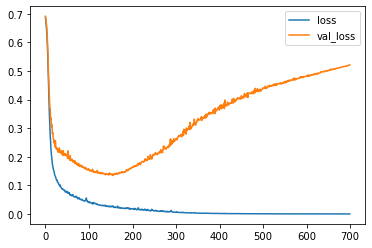

In [34]:
modelkaybi.plot()

In [35]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation ="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [36]:
earlyStop = EarlyStopping(monitor = "val_loss",mode = "min",verbose = 1,patience = 25)
# monitor -> neyi izlemek istiyorsak o
# mode => istediğimizin değeri, min mi olsun max mı olsun
# verbose
# patience = epoch kaç kereden sonra bir iyileştirme yapmıyor artık, onu ölçmek için

In [37]:
model.fit(x=x_train, y = y_train, epochs = 700, validation_data=(x_test,y_test),callbacks=[earlyStop])

Epoch 1/700
12/12 [==============================] - 1s 14ms/step - loss: 0.6845 - val_loss: 0.6801
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6708 - val_loss: 0.6707
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6542 - val_loss: 0.6571
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6303 - val_loss: 0.6357
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5980 - val_loss: 0.6097
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5582 - val_loss: 0.5771
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5121 - val_loss: 0.5431
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4613 - val_loss: 0.5044
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4096 - val_loss: 0.4662
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3586 - val_loss: 0.4338
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0474 - val_loss: 0.2001
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0459 - val_loss: 0.2038
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0461 - val_loss: 0.2011
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0453 - val_loss: 0.2035
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 0.1974
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0461 - val_loss: 0.2048
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.1953
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.2037
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.1987
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.1990
Epoch 93/700


12/12 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.1880
Epoch 165/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.1929
Epoch 166/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.1878
Epoch 167/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.1947
Epoch 168/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.1902
Epoch 169/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0156 - val_loss: 0.1919
Epoch 170/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.1881
Epoch 171/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.1880
Epoch 172/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.1896
Epoch 173/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.1888
Epoc

In [38]:
# epoch 180de durdu

In [39]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

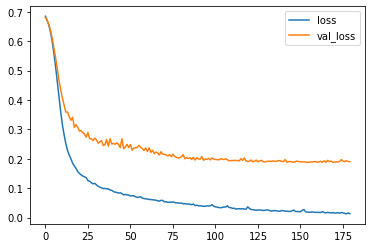

In [40]:
modelKaybi.plot()

In [41]:
#layerlarla ilgili bir overfitting yaşanıyorsa, dropout kullanılır

In [42]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.50))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.50))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.50))
model.add(Dense(units = 1, activation ="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [43]:
model.fit(x=x_train, y = y_train, epochs = 700, validation_data=(x_test,y_test),callbacks=[earlyStop])

Epoch 1/700
12/12 [==============================] - 1s 13ms/step - loss: 0.7084 - val_loss: 0.6925
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6935 - val_loss: 0.6927
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6872 - val_loss: 0.6926
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6805 - val_loss: 0.6915
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6819 - val_loss: 0.6894
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6700 - val_loss: 0.6860
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6686 - val_loss: 0.6822
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6544 - val_loss: 0.6766
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6583 - val_loss: 0.6700
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6680 - val_loss: 0.6636
Epoch 11

12/12 [==============================] - 0s 4ms/step - loss: 0.2077 - val_loss: 0.2517
Epoch 84/700
12/12 [==============================] - 0s 4ms/step - loss: 0.1632 - val_loss: 0.2535
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.1862 - val_loss: 0.2503
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.1971 - val_loss: 0.2456
Epoch 87/700
12/12 [==============================] - 0s 4ms/step - loss: 0.1762 - val_loss: 0.2491
Epoch 88/700
12/12 [==============================] - 0s 4ms/step - loss: 0.1796 - val_loss: 0.2594
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.1748 - val_loss: 0.2549
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.1934 - val_loss: 0.2571
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.1721 - val_loss: 0.2582
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.1837 - val_loss: 0.2629
Epoch 93/700


In [44]:
loss = model.history.history

In [45]:
loss = pd.DataFrame(loss)

<AxesSubplot:>

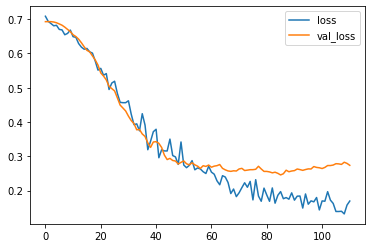

In [46]:
loss.plot()

In [52]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

6/6 [==============================] - 0s 805us/step


In [54]:
classes_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
classification_report(y_test,tahminler)

ValueError: Classification metrics can't handle a mix of binary and continuous targets